<a href="https://colab.research.google.com/github/dasmiq/cs6120-hw1/blob/main/token_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical Regularities of Language

In this first homework assignment, you will familiarize yourself with some empirical regularities of natural language, Shannon entropy and Zipf's Law.

Read through this Jupyter notebook and fill in the parts marked with `TODO`. When you're ready to submit, print the notebook as a PDF and upload to Gradescope.

## Shannon Entropy

Shannon borrowed the concept of entropy from statistical physics to develop _information theory_, focused on encoding and compressing messages. A few years later, in 1950, he applied information theory to analyze human predictive ability—in other words, the entropy of the human language model. You can read the original article, [Prediction and Entropy of Printed English](https://languagelog.ldc.upenn.edu/myl/Shannon1950.pdf), for more details.

Your first task is to collect data on how predictable different letters are in an English sentence, depending on how much context in a word or sentence you have.

Go to the [Shannon game page](https://www.ccs.neu.edu/home/dasmith/courses/cs6120/shannon/) that we demonstrated in class. We already guessed part of Text 1, so work through Texts 2, 3, and 4.

In [ ]:
# TODO: Enter the arrays of numbers of guesses for Texts 2, 3, and 4 here.


Rearrange the guess data into a two-dimensional array, relating number of characters of context (0, 1, 2, ...) to number of guesses required.

In other words, you might look in cell (2, 1) and read "2" if the number of times it took one guess to get the right letter with two characters of context was 2.

In [ ]:
# TODO: Create array of counts of guesses. Print out the array so we can see it.

Now you can compute Shannon's upper and lower bounds on the entropy of your predictive distribution for English. The upper bound, as a function of the number of context characters $N$, is just the Shannon entropy of the distribution of numbers of guesses. In other words, it's the entropy of the original text as &ldquo;reduced&rdquo; by the human encoder to a sequence of numbers of guesses.

$F_N = -\sum_{i=1}^{27} q_i^N \log_2 q_i^N$

where $q_i^N$ is the number of times you took $i$ guesses with $N$ characters of context, i.e., one of the cells in the table you computed. The number of guesses ranges from 1 to 27 since we restrict ourselves to 26 letters plus space. In computing entropy, we define $0 \log 0 = 0$.

In [ ]:
# TODO: Compute the upper bound for each amount of context N and print it out.

Shannon derived a lower bound on entropy from the guess data as

$\sum_{i=1}^{27} i(q_i^N - q_{i+1}^N) \log_2 i$

In [ ]:
# TODO: Compute thew lower bound for each amount of context N and print it out.

## Zipf's Law

Now let's look at some text data directly to see the skewed distribution of tokens predicted by Zipf's Law. Recall that Zipf's law states that a word's rank (from the most common word at rank 1 on down) to its frequency is approximately a constant, i.e., $r \cdot f = k$. Equivalently, we can divide both sides by the total number of tokens $N$ to get $r \cdot P_r = c$, where $c = k/N$ and $P_r = f/N$ is the _relative frequency_ of word $r$.

We start by downloading a sample of 1000 open-access English books from [Project Gutenberg](https://gutenberg.org/).

In [ ]:
# If your local environment doesn't have the wget command,
# you can comment this out and download it manually.
!wget "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"

--2025-09-20 03:01:26--  http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz
Resolving khoury.northeastern.edu (khoury.northeastern.edu)... 52.70.229.197
Connecting to khoury.northeastern.edu (khoury.northeastern.edu)|52.70.229.197|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150984197 (144M) [application/x-gzip]
Saving to: ‘pg-sample.json.gz.1’

pg-sample.json.gz.1 100%[===================>] 143.99M  37.0MB/s    in 4.5s    

2025-09-20 03:01:31 (31.8 MB/s) - ‘pg-sample.json.gz.1’ saved [150984197/150984197]



The file is compressed with gzip and is in a JSON lines format. Each line is one JSON record, which we parse with the `json` library.

Here we print out the keys in the first record: `id`, `author`, `title`, and `text`.

In [ ]:
import gzip, json
for line in gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8"):
  rec = json.loads(line)
  print(rec.keys())
  print(rec['author'])
  print(rec['title'])
  print(rec['text'][0:100])
  break

dict_keys(['id', 'author', 'title', 'text'])
Jefferson, Thomas
The Declaration of Independence of the United States of America


This is a retranscription of one of the first Project
Gutenberg Etexts, offically dated December 3


Your task now is to **tokenize** the text in the `text` field of each record into an array of words. Later on in this course, we will discuss learning better tokenizers. For now, you should separate words on whitespace (space, newline, tab) and punctuation. Convert the tokens to lower case, and keep only those tokens that have at least one letter a-z in them. In general, numerals in text tend not to follow Zipf's law but [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law).

You might use _regular expressions_ (e.g., the `re.split` function) to help with tokenization and filtering.

After you have tokenized, compute $N$, the total number of tokens in the corpus and print it out.

In [ ]:
import gzip, json, re

tokens = []
for line in gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8"):
  rec = json.loads(line)
  words = re.split(r"[^a-zA-Z]+", rec["text"].lower())
  words = [w for w in words if w]
  tokens.extend(words)

N = len(tokens)
print(N)

69635098


Now, count the frequency each unigram (distinct word) in the corpus and sort them in an array in descending order of frequency. The first item in your array should be the most common word. Print out that word and its frequency

In [ ]:
from collections import Counter

unigram_counts = Counter(tokens)
unigrams_desc = unigram_counts.most_common()
print(unigrams_desc[0][0], unigrams_desc[0][1])

the 4468492


Now, you can look at the Zipf's law relationship between rank and relative frequency (i.e., frequency divided by $N$). Plot the data using a python graphing package such as matplotlib, plotly, or plotnine. This doesn't have to be a fancy graph, so use whatever you're familiar with. Both axes should be on a log scale. If your package doesn't support log scales, you can take the log of the rank and relative frequency yourself before plotting. Recall that since python arrays are zero-indexed, the rank 1 word will be element 0 of your sorted array.

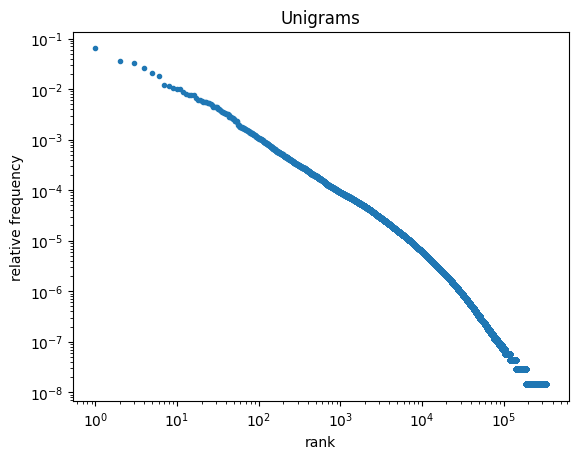

In [ ]:
import matplotlib.pyplot as plt

freqs = [c for _, c in unigrams_desc]
relative = [c / N for c in freqs]
ranks = list(range(1, len(relative) + 1))

plt.figure()
plt.loglog(ranks, relative, marker=".", linestyle="none")
plt.xlabel("rank")
plt.ylabel("relative frequency")
plt.title("Unigrams")
plt.show()

Now, take your array of tokens and compute the counts of both the bigrams and trigrams and sort them in descending order of frequency. Print out the most common bigram and trigram.

In [ ]:
from collections import Counter
from itertools import islice

bigrams = list(zip(tokens, islice(tokens, 1, None)))
trigrams = list(zip(tokens, islice(tokens, 1, None), islice(tokens, 2, None)))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

most_common_bigram = bigram_counts.most_common(1)[0]
most_common_trigram = trigram_counts.most_common(1)[0]

print(" ".join(most_common_bigram[0]), most_common_bigram[1])
print(" ".join(most_common_trigram[0]), most_common_trigram[1])

NameError: name 'tokens' is not defined

In [ ]:
bigram_freqs = [c for _, c in bigram_counts.most_common()]
bigram_total = sum(bigram_freqs)
bigram_relative = [c / bigram_total for c in bigram_freqs]
bigram_ranks = list(range(1, len(bigram_relative) + 1))

import matplotlib.pyplot as plt

plt.figure()
plt.loglog(bigram_ranks, bigram_relative, marker=".", linestyle="none")
plt.xlabel("rank")
plt.ylabel("relative frequency")
plt.title("Bigrams")
plt.show()


In [ ]:
trigram_freqs = [c for _, c in trigram_counts.most_common()]
trigram_total = sum(trigram_freqs)
trigram_relative = [c / trigram_total for c in trigram_freqs]
trigram_ranks = list(range(1, len(trigram_relative) + 1))

plt.figure()
plt.loglog(trigram_ranks, trigram_relative, marker=".", linestyle="none")
plt.xlabel("rank")
plt.ylabel("relative frequency")
plt.title("Trigrams")
plt.show()


The unigram curve is close to a straight line on log-log axes, consistent with Zipf's law. Bigrams and trigrams deviate more in the head and tail, with steeper slopes reflecting increased sparsity and stronger context dependence.